In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
palette = sns.color_palette("rainbow", 8)

In [175]:
# Read, load the dataset

df = pd.read_csv('layoffs_data.csv')

df.head().style.set_properties(**{'background-color': '#E1F8FF','color': '#000','border': '1px solid #4AD3FF'})


,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,IRL,SF Bay Area,Consumer,1.000000,2023-06-23,https://www.theinformation.com/articles/social-app-irl-which-raised-200-million-shuts-down-after-ceo-misconduct-probe,197.000000,Series C,2023-06-25 23:04:16,United States,nan,Unknown
1,Retool,SF Bay Area,Other,0.090000,2023-06-22,Internal memo,141.000000,Series C,2023-06-22 14:23:40,United States,nan,Unknown
2,Anaplan,SF Bay Area,Other,nan,2023-06-21,https://nypost.com/2023/06/23/software-giant-anaplan-begins-layoffs-after-thoma-bravos-10-4b-buyout-deal/,300.000000,Acquired,2023-06-24 03:48:00,United States,300.000000,Unknown
3,Uber,SF Bay Area,Transportation,nan,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-off-200-employees-in-recruitment-division,25200.000000,Post-IPO,2023-06-22 00:19:03,United States,200.000000,Unknown
4,Tackle.io,Boise,Infrastructure,nan,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.000000,Series C,2023-06-23 15:38:59,United States,75.000000,Unknown


In [177]:
'''
Data Description

1. Company: Name of the company
2. Location: Location of the company hq
3. Industry: Type of industry the company's business domain aligns with
4. Percentage - Percentage of layoff
5. Date - Date of layoff
6. Source - Data gathered from source
7. Funds_Raised - Total funds raised
8. Stage - Stage of the company
9. Date_Added - data added in databas
10. Country - The base country of the company
11. Laid_Off_Count - Total count
12. List_of_Employees_Laid_Off - link to g_docs of employee list
'''

df.shape

(2738, 12)

In [179]:
# Data Exploration

df.info()    # Check for the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2738 non-null   object 
 1   Location_HQ                 2738 non-null   object 
 2   Industry                    2738 non-null   object 
 3   Percentage                  1819 non-null   float64
 4   Date                        2738 non-null   object 
 5   Source                      2738 non-null   object 
 6   Funds_Raised                2466 non-null   float64
 7   Stage                       2738 non-null   object 
 8   Date_Added                  2738 non-null   object 
 9   Country                     2738 non-null   object 
 10  Laid_Off_Count              1871 non-null   float64
 11  List_of_Employees_Laid_Off  2737 non-null   object 
dtypes: float64(3), object(9)
memory usage: 256.8+ KB


In [181]:
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,1819.000000,2466.000000,1871.000000
mean,0.265282,805.994118,252.405665
std,0.265125,5295.209903,818.989438
min,0.000000,0.000000,3.000000
25%,0.100000,50.000000,40.000000
50%,0.170000,157.000000,80.000000
75%,0.300000,445.000000,180.000000
max,1.000000,121900.000000,12000.000000


In [183]:
df.isna().any()

Company                       False
Location_HQ                   False
Industry                      False
Percentage                     True
Date                          False
Source                        False
Funds_Raised                   True
Stage                         False
Date_Added                    False
Country                       False
Laid_Off_Count                 True
List_of_Employees_Laid_Off     True
dtype: bool

In [185]:
# Here we can see that the Percentage, Funds_Raised, Laid_Off_Count, List_of_Employees_Laid_Off
# are the 4 columns that have some null values present in them

# Let us check for the total number of null values per column

In [187]:
df.isna().sum()    # Check for all the null values in the columns

Company                         0
Location_HQ                     0
Industry                        0
Percentage                    919
Date                            0
Source                          0
Funds_Raised                  272
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                867
List_of_Employees_Laid_Off      1
dtype: int64

In [189]:
# Feature Engineering

# Here we create an additional column to keep track of the year in which the lay offs occured


df['year_of_layoff'] = pd.to_datetime(df['Date_Added']).dt.strftime('%Y')


In [191]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off'], axis=1, inplace=True)

In [193]:
# Drop the rows that do not show lay off counts

df = df[df['Laid_Off_Count'].notna()]

In [195]:
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_layoff
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,300.0,Acquired,United States,300.0,2023
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,25200.0,Post-IPO,United States,200.0,2023
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,148.0,Series C,United States,75.0,2023
5,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,2023
7,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,2023


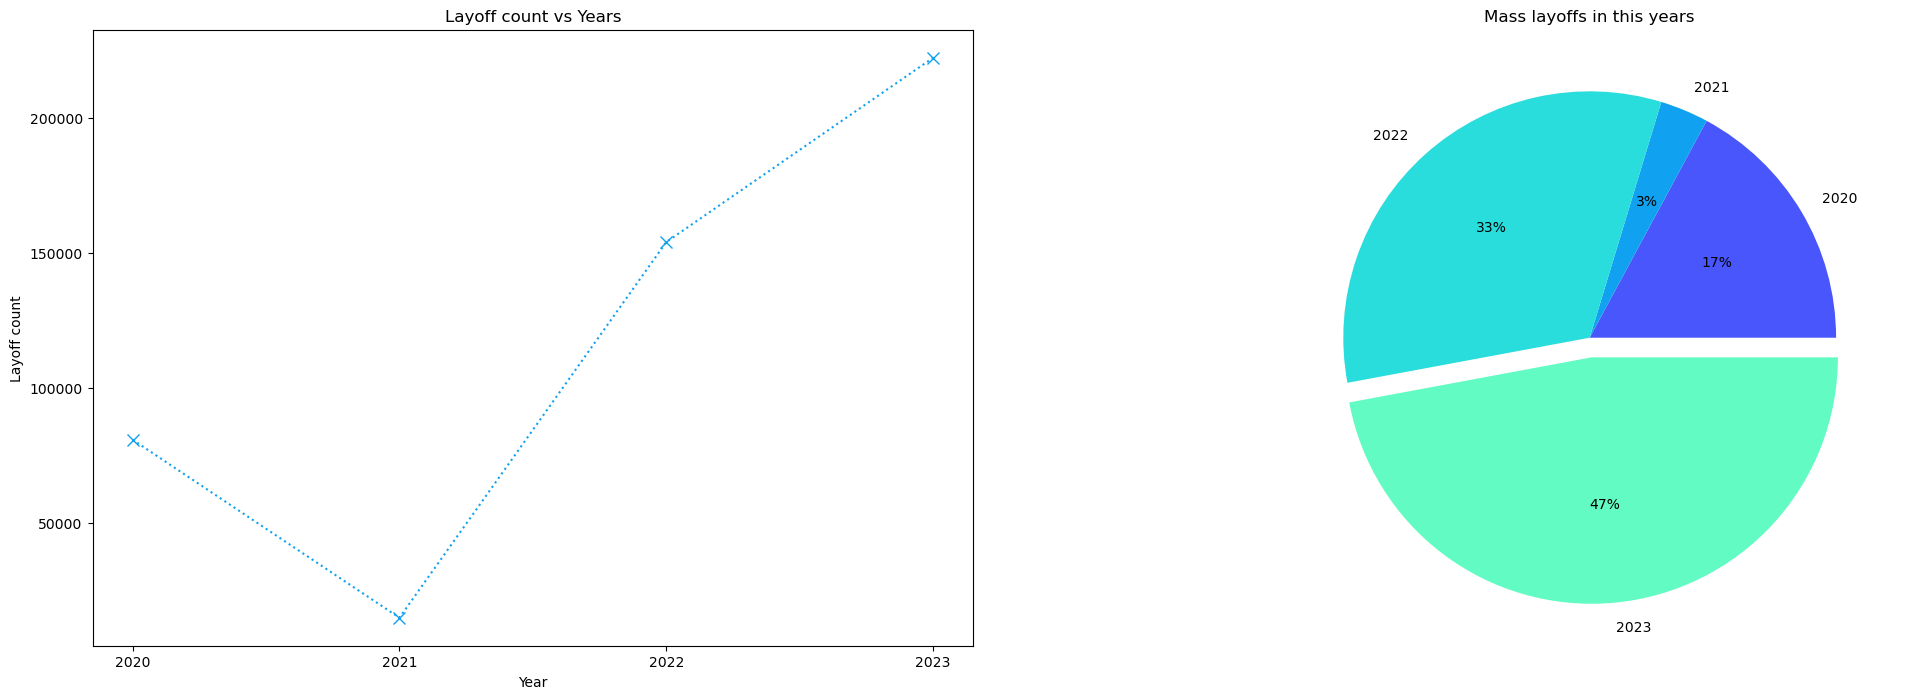

In [197]:
# Data Analytics


# 1. Visualizing the number of layoffs throughout the years

plt.figure(figsize=(25, 8))

layoffcount_peryear = df.groupby('year_of_layoff', as_index=False).sum()
plt.subplot(1, 2, 1)
plt.plot(layoffcount_peryear['year_of_layoff'], layoffcount_peryear['Laid_Off_Count'], marker="x", linestyle=':', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year'), plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1,2,2)
plt.pie(data = layoffcount_peryear, x = layoffcount_peryear['Laid_Off_Count'], labels = layoffcount_peryear['year_of_layoff'], autopct='%.f%%',
        explode = [0, 0, 0, 0.08], colors=palette)
plt.title("Mass layoffs in this years")
plt.show()

In [199]:
# Analyze the layoff impact per country and thus analyze the situation per continent.

layoff_countby_country = df.groupby('Country', as_index=False).sum()


In [201]:
# Assign the countries manually to continents

asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria','Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 
          'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

n_america = ['Canada', 'Mexico', 'United States']
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']

In [203]:
asia_insight = layoff_countby_country.loc[layoff_countby_country['Country'].isin(asia)]
europe_insight = layoff_countby_country.loc[layoff_countby_country['Country'].isin(europe)]

nAmerica_insight = layoff_countby_country.loc[layoff_countby_country['Country'].isin(n_america)]
sAmerica_insight = layoff_countby_country.loc[layoff_countby_country['Country'].isin(s_america)]

africa_insight = layoff_countby_country.loc[layoff_countby_country['Country'].isin(africa)]
oceania_insight = layoff_countby_country.loc[layoff_countby_country['Country'].isin(oceania)]

/var/folders/5h/44ms15jd049cjv65pbwg11lh0000gn/T/ipykernel_92746/3713870287.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/5h/44ms15jd049cjv65pbwg11lh0000gn/T/ipykernel_92746/3713870287.py:4: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.

/var/folders/5h/44ms15jd049cjv65pbwg11lh0000gn/T/ipykernel_92746/3713870287.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/5h/44ms15jd049cjv65pbwg11lh0000gn/T/ipykernel_92746/3713870287.py:10: UserWarning:


The palette list has fewer values (8) than needed (18) and will cycle, which may produce an uninterpretable plot.

/var/folders/5h/44ms15jd049cjv65pbwg11lh

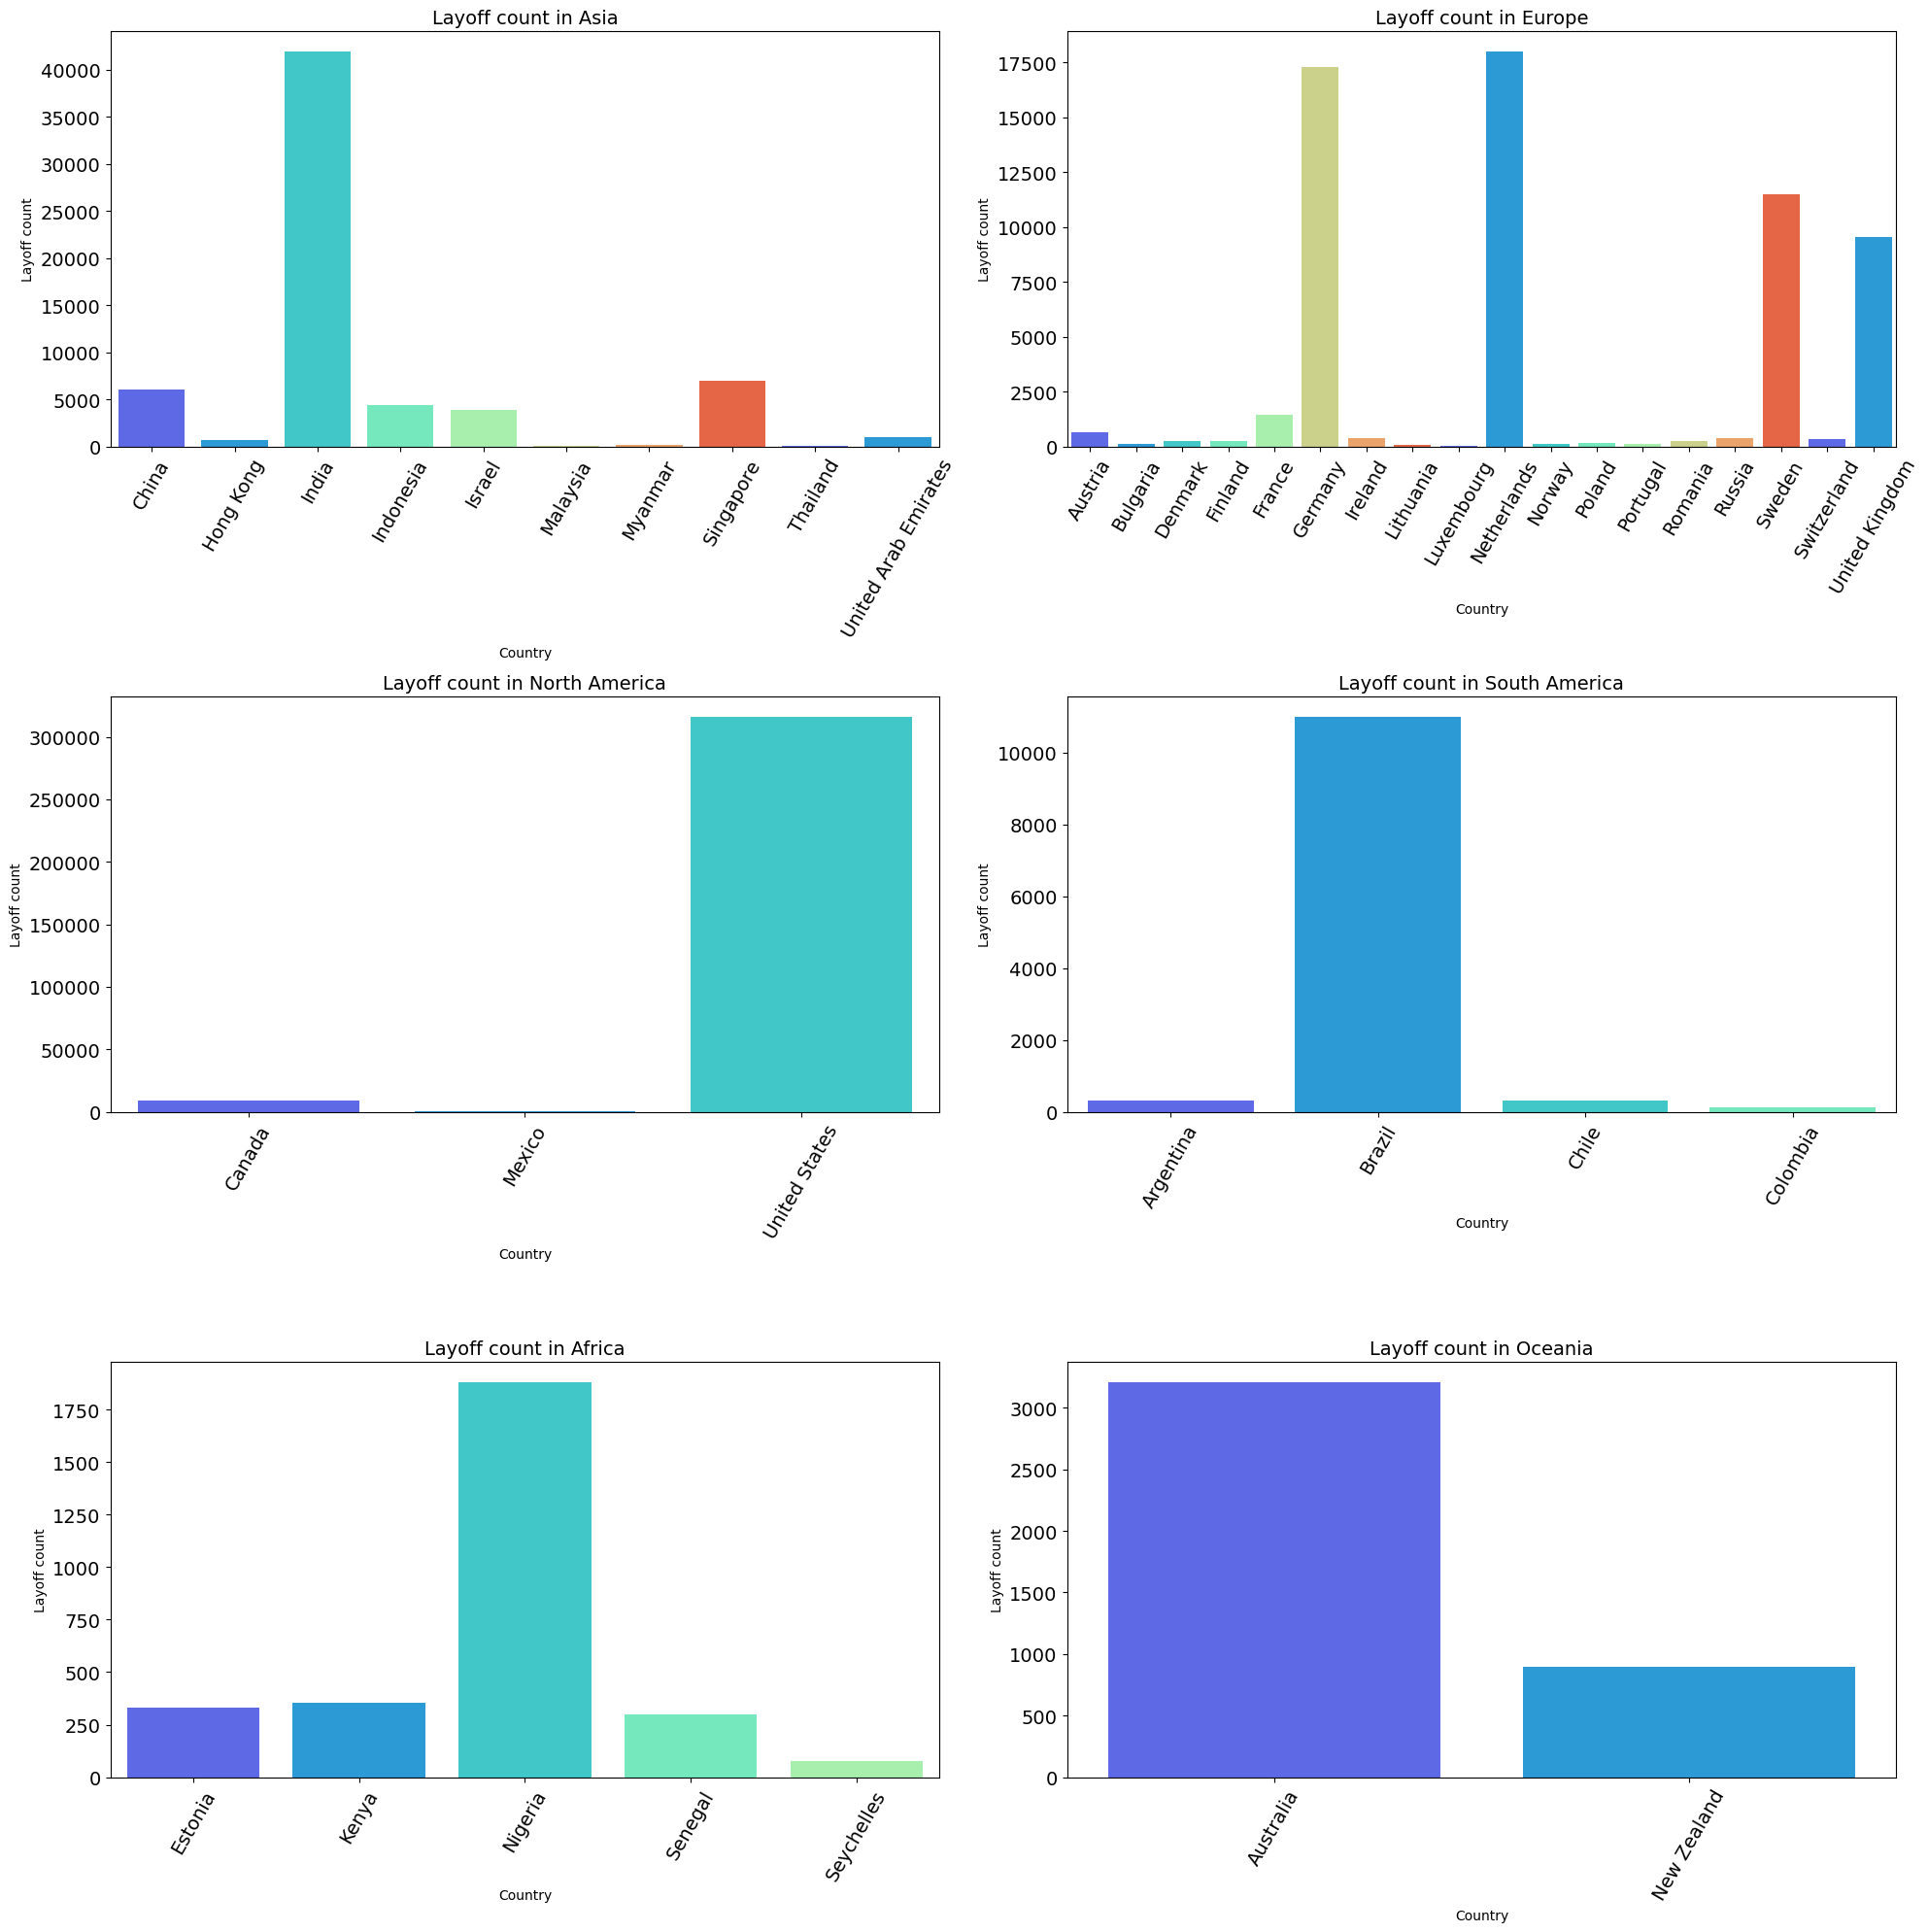

In [205]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 2)
sns.barplot(data=europe_insight, y=europe_insight['Laid_Off_Count'], x=europe_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 3)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in North America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 4)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in South America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 5)
sns.barplot(data=africa_insight, y=africa_insight['Laid_Off_Count'], x=africa_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 6)
sns.barplot(data=oceania_insight, y=oceania_insight['Laid_Off_Count'], x=oceania_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [207]:
# The key take away from these plots is the fact that India, Germany, Netherlands, 
# Sweden, United Kingdom, United States, Nigeria, and Australia are the countries with the maximum
# impact of lay offs

In [209]:
# Visualize the top impacted countries

In [211]:
mass_layoff_countries_list = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']

In [213]:
mass_layoff_countries = layoff_countby_country.loc[layoff_countby_country['Country'].isin(mass_layoff_countries_list)]

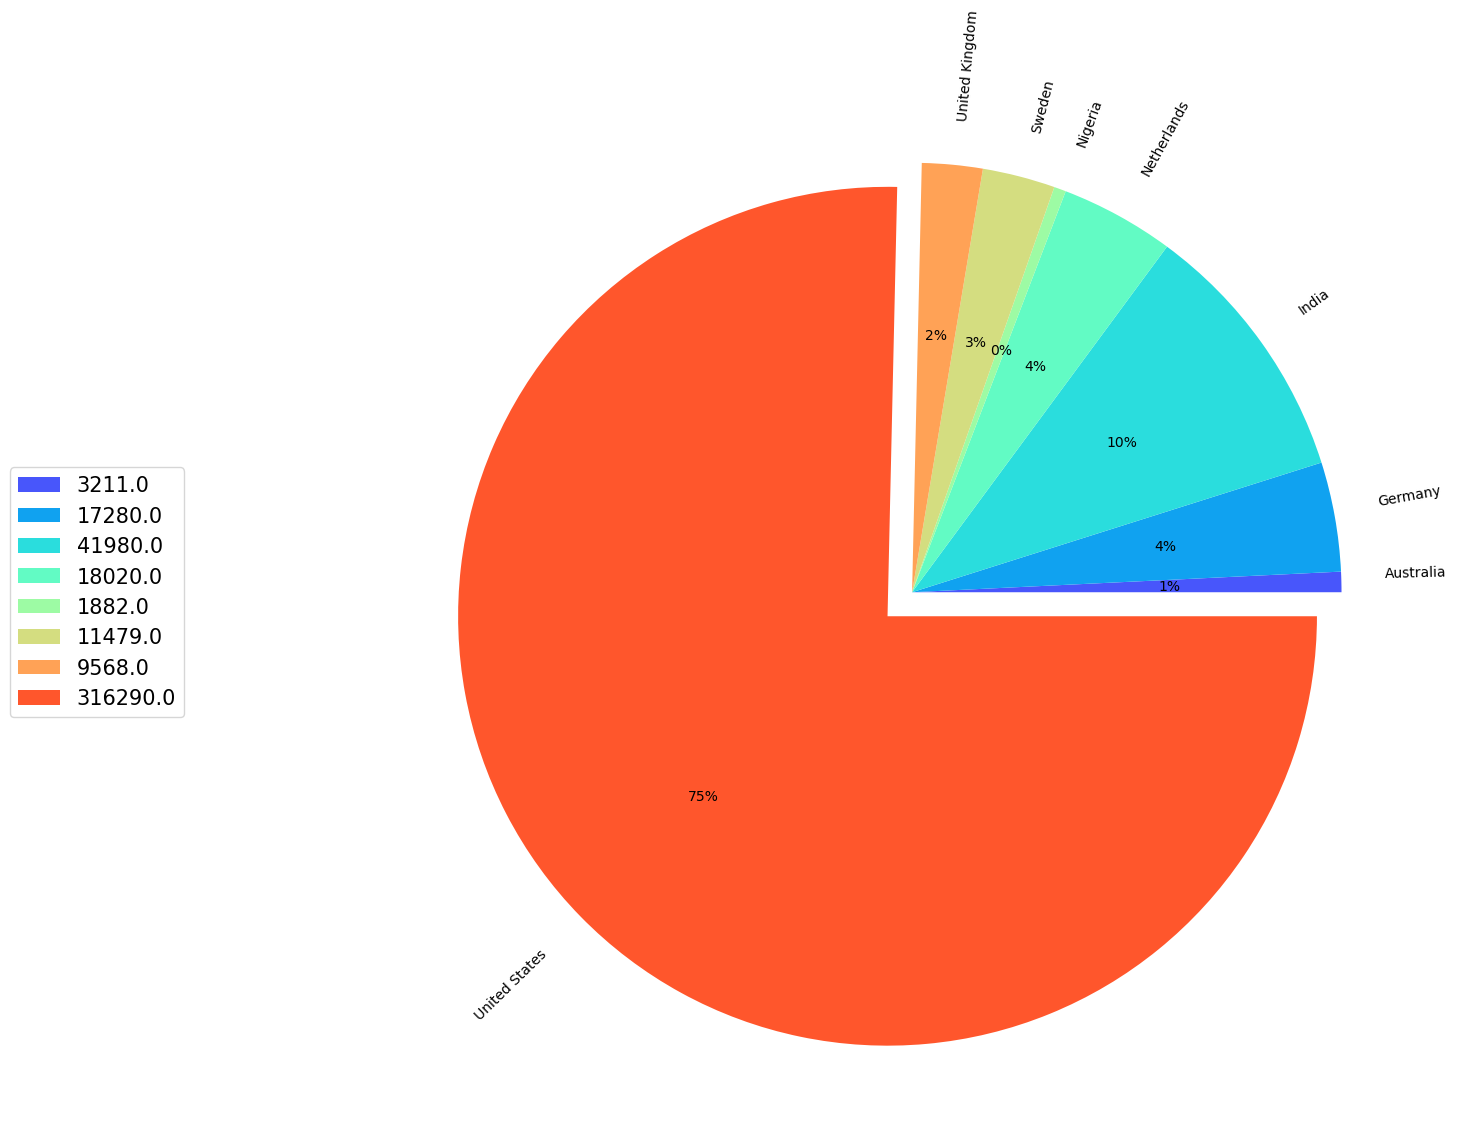

In [215]:
# Plot them


plt.figure(figsize=(15, 20))
plt.pie(data=mass_layoff_countries, x=mass_layoff_countries['Laid_Off_Count'], labels=mass_layoff_countries['Country'],
        explode = [0, 0, 0, 0, 0, 0, 0, 0.08], 
        autopct='%.f%%', colors=palette, rotatelabels=True, wedgeprops = {'linewidth': 3})
plt.legend(mass_layoff_countries['Laid_Off_Count'], loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=15)
plt.xticks(fontsize=50), plt.yticks(fontsize=50)
plt.tight_layout()
plt.show()

In [217]:
# Analyze the companies with a 100% layoff rate

insight_rate = df.loc[df['Percentage'] == 1.00].dropna()
insight_rate.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_layoff
22,Bitwise,SF Bay Area,Crypto,1.0,2023-06-14,84.0,Series B,United States,900.0,2023
232,Milkrun,Sydney,Food,1.0,2023-04-11,86.0,Series A,Australia,400.0,2023
461,Dropp,Berlin,Retail,1.0,2023-02-14,2.0,Unknown,Germany,60.0,2023
511,Openpay,Melbourne,Finance,1.0,2023-02-07,299.0,Post-IPO,Australia,83.0,2023
710,Britishvolt,London,Transportation,1.0,2023-01-17,2400.0,Unknown,United Kingdom,206.0,2023


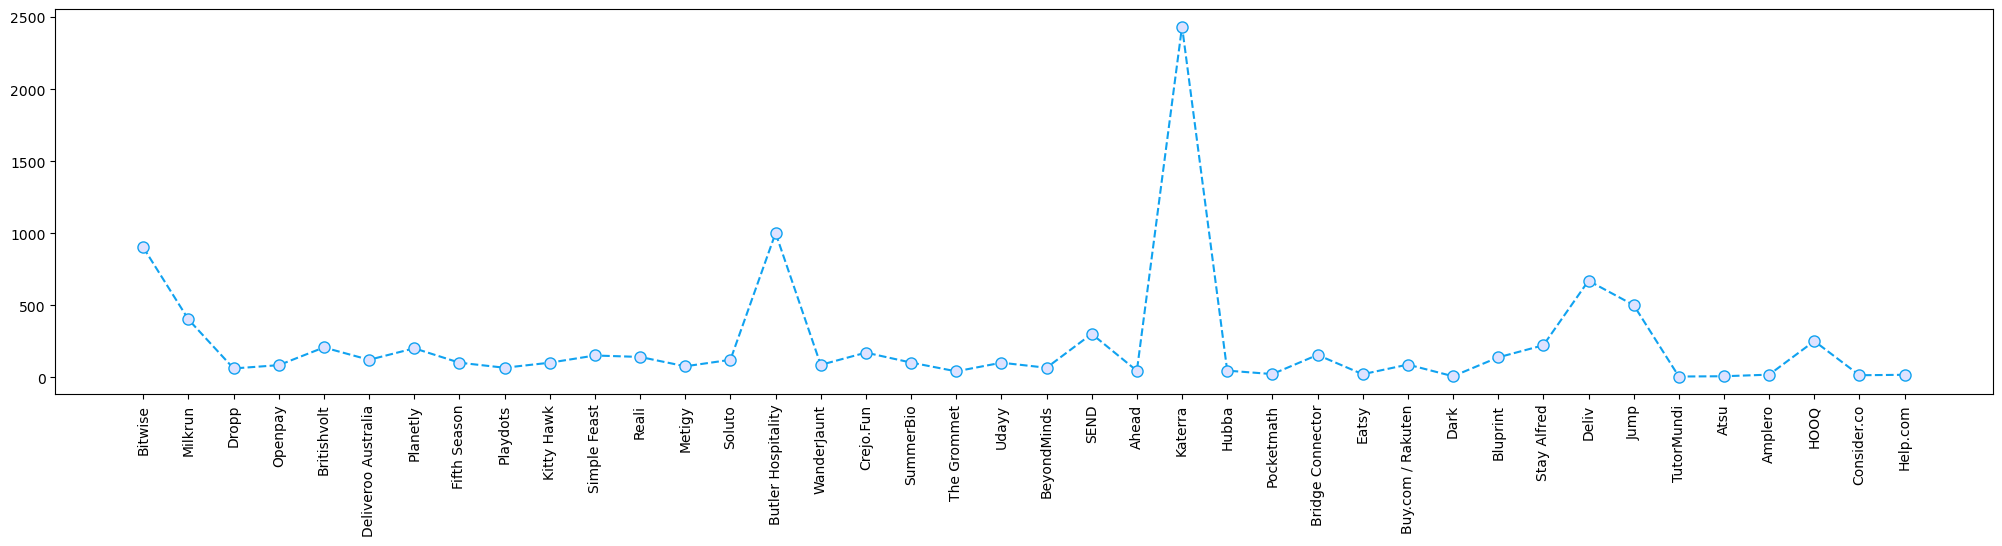

In [219]:
plt.figure(figsize=(25,5))

plt.plot(insight_rate['Company'], insight_rate['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xticks(rotation = 90)
plt.show()

In [221]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [222]:
from geopy.geocoders import Nominatim


In [223]:
geolocator = Nominatim(user_agent="layoff_data")

In [224]:
insight_rate.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_layoff
22,Bitwise,SF Bay Area,Crypto,1.0,2023-06-14,84.0,Series B,United States,900.0,2023
232,Milkrun,Sydney,Food,1.0,2023-04-11,86.0,Series A,Australia,400.0,2023
461,Dropp,Berlin,Retail,1.0,2023-02-14,2.0,Unknown,Germany,60.0,2023
511,Openpay,Melbourne,Finance,1.0,2023-02-07,299.0,Post-IPO,Australia,83.0,2023
710,Britishvolt,London,Transportation,1.0,2023-01-17,2400.0,Unknown,United Kingdom,206.0,2023


In [225]:
# Extract the geolocation points of the companies

for i in range(len(insight_rate['Location_HQ'])):
    def find_lat(i):
        return geolocator.geocode(i).latitude
    
    def find_long(i):
        return geolocator.geocode(i).longitude
    
insight_rate['latitude'] = insight_rate['Location_HQ'].apply(find_lat)
insight_rate['longitude'] = insight_rate['Location_HQ'].apply(find_long)

insight_rate = insight_rate.fillna(0)

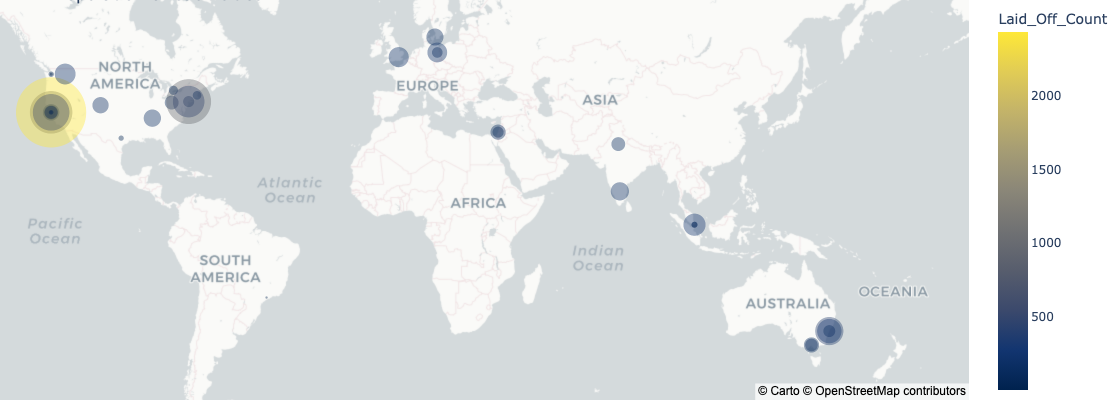

In [230]:
insight_rate_fig = px.scatter_mapbox(insight_rate,lat='latitude',lon='longitude', hover_name='Location_HQ', hover_data=['Laid_Off_Count', "Company"], 
    color='Laid_Off_Count',color_continuous_scale=px.colors.sequential.Cividis,
    size="Laid_Off_Count", size_max=50, opacity=0.4,
    center={'lat':10, 'lon':30},
    zoom=1,
    height=400,width=1400,
    mapbox_style="carto-positron")
insight_rate_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
insight_rate_fig.update_layout(title_text="Population of each cities")
insight_rate_fig.show()

In [231]:
# Divide the data into 4 groups based on the layout count.
# 3-35, 35-73, 73-154, and 154-11000

In [232]:
grp1_insight = df.loc[(df['Laid_Off_Count'] <= 35)]
grp2_insight = df.loc[(df['Laid_Off_Count'] > 35) & (df['Laid_Off_Count'] <= 73)]
grp3_insight = df.loc[(df['Laid_Off_Count'] > 75) & (df['Laid_Off_Count'] <= 153)]
grp4_insight = df.loc[(df['Laid_Off_Count'] > 153)]

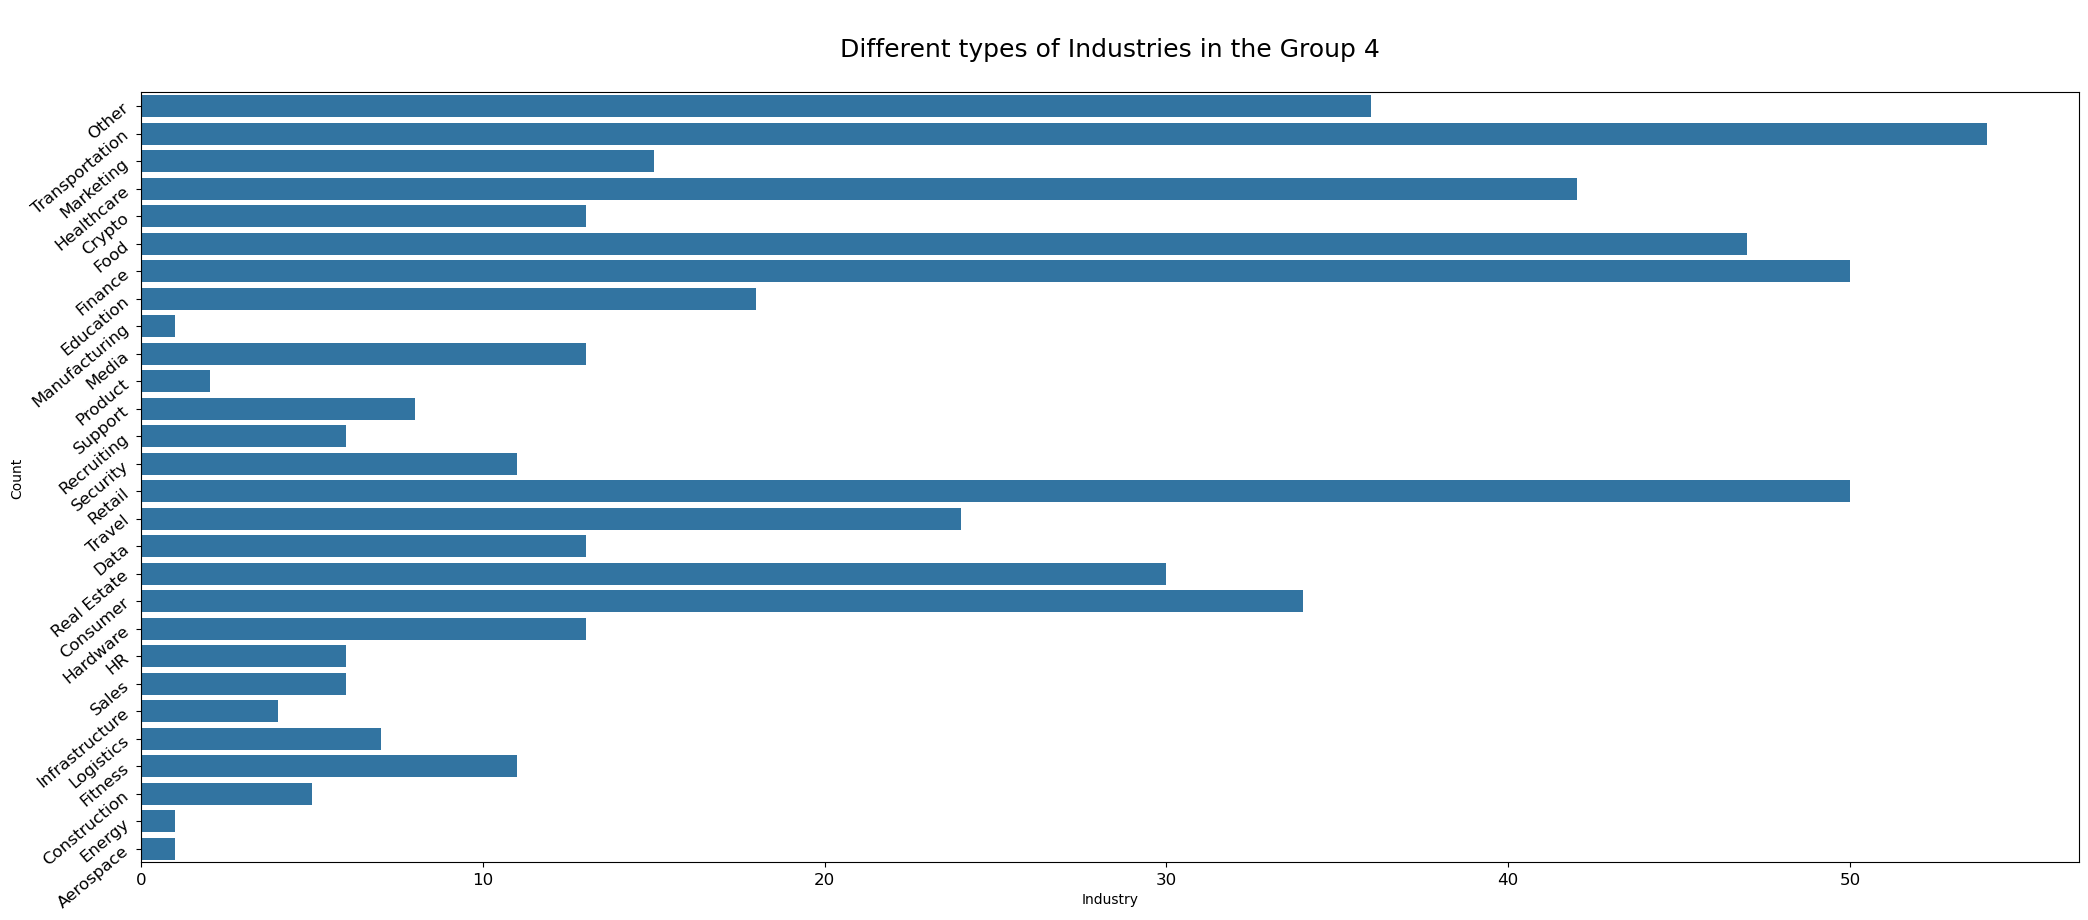

In [233]:
# Plot the type of industries with highest layoffs impact.
plt.figure(figsize=(25,10))

sns.countplot(y='Industry', data=grp4_insight)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nDifferent types of Industries in the Group 4\n", fontsize=18)

plt.show()

In [234]:
# Sort the above companies based on the lay off count.

top10_comp = grp4_insight.sort_values('Laid_Off_Count', ascending=False)
top10_comp = top10_comp.head(10)
top10_comp

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_layoff
651,Google,SF Bay Area,Consumer,0.06,2023-01-20,26.0,Post-IPO,United States,12000.0,2023
1126,Meta,SF Bay Area,Consumer,0.13,2022-11-09,26000.0,Post-IPO,United States,11000.0,2022
328,Meta,SF Bay Area,Consumer,NaN,2023-03-14,26000.0,Post-IPO,United States,10000.0,2023
1058,Amazon,Seattle,Retail,0.03,2022-11-16,108.0,Post-IPO,United States,10000.0,2022
684,Microsoft,Seattle,Other,0.05,2023-01-18,1.0,Post-IPO,United States,10000.0,2023
311,Amazon,Seattle,Retail,NaN,2023-03-20,108.0,Post-IPO,United States,9000.0,2023
397,Ericsson,Stockholm,Other,0.08,2023-02-24,663.0,Post-IPO,Sweden,8500.0,2023
193,Flink,Berlin,Food,0.40,2023-04-24,1000.0,Series B,Germany,8000.0,2023
824,Amazon,Seattle,Retail,0.02,2023-01-04,108.0,Post-IPO,United States,8000.0,2023
825,Salesforce,SF Bay Area,Sales,0.10,2023-01-04,65.0,Post-IPO,United States,8000.0,2023


/var/folders/5h/44ms15jd049cjv65pbwg11lh0000gn/T/ipykernel_92746/1102137687.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/5h/44ms15jd049cjv65pbwg11lh0000gn/T/ipykernel_92746/1102137687.py:6: UserWarning:

The palette list has more values (8) than needed (7), which may not be intended.



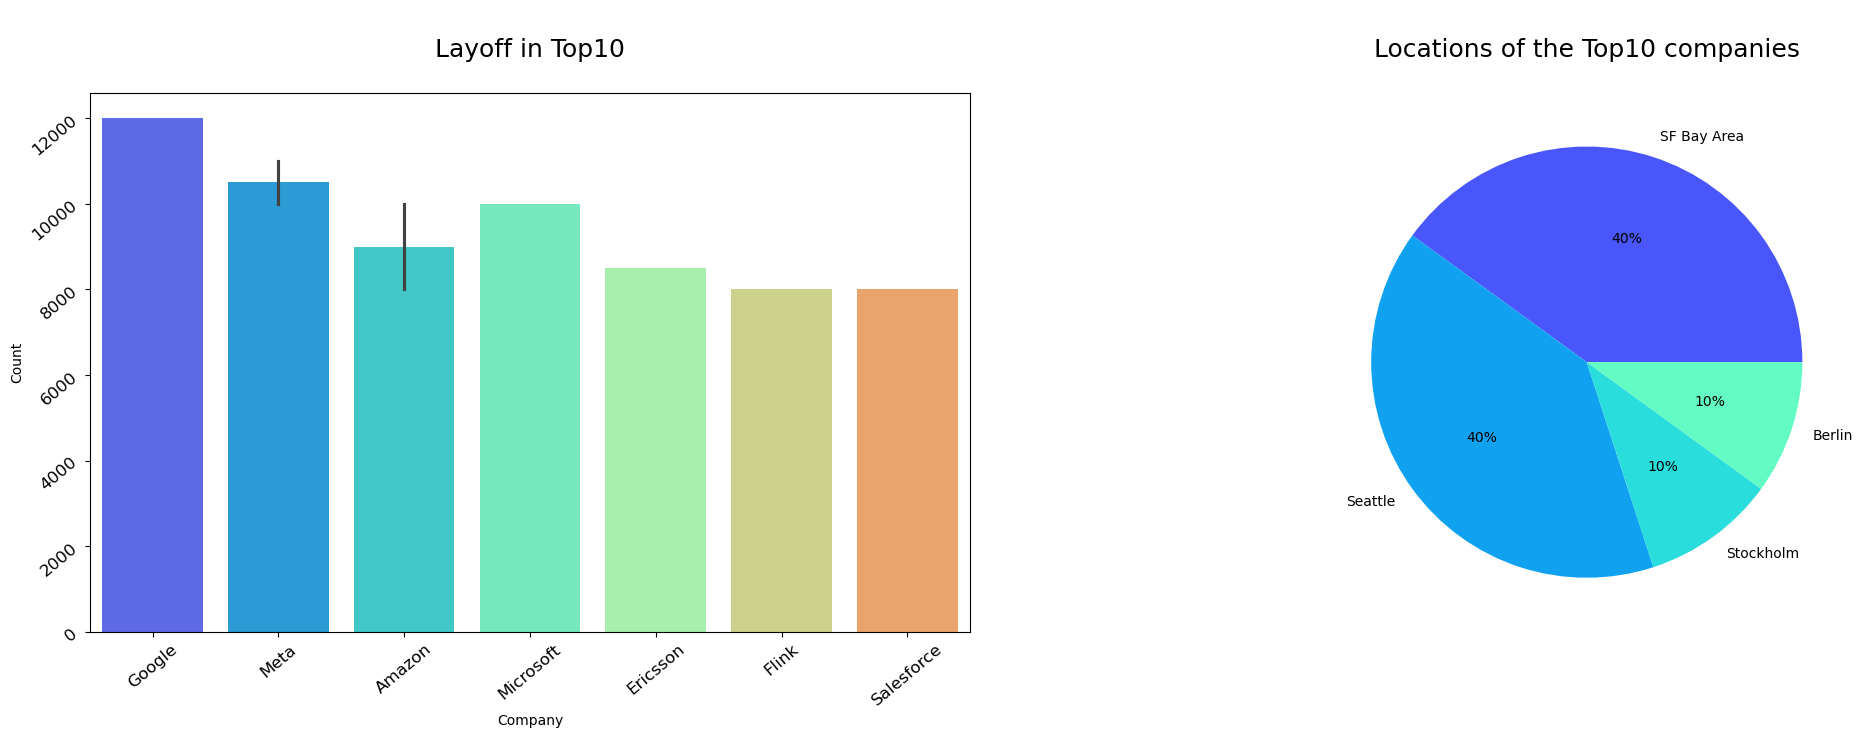

In [235]:
# Plot the location and count of the top 10 companies.

plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
sns.barplot(data=top10_comp, x=top10_comp['Company'], y=top10_comp['Laid_Off_Count'], palette=palette)
plt.xlabel('Company'), plt.ylabel('Count')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nLayoff in Top10\n", fontsize=18)

plt.subplot(1, 2, 2)
top10_comp_loca = top10_comp['Location_HQ'].value_counts()
plt.pie(data=top10_comp, x=top10_comp_loca.values, labels=top10_comp_loca.index, autopct='%.f%%',  explode = [0, 0, 0, 0], colors=palette)
plt.title("\nLocations of the Top10 companies\n", fontsize=18)

plt.show()

In [236]:
# Goelocation information of the top 10 companies

for i in range(len(top10_comp['Location_HQ'])):
    def find_lat(i):
        return geolocator.geocode(i).latitude
    
    def find_long(i):
        return geolocator.geocode(i).longitude

In [237]:
top10_comp['latitude'] = top10_comp['Location_HQ'].apply(find_lat)
top10_comp['longitude'] = top10_comp['Location_HQ'].apply(find_long)

In [238]:
top10_comp = top10_comp.fillna(0)
top10_comp.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_layoff,latitude,longitude
651,Google,SF Bay Area,Consumer,0.06,2023-01-20,26.0,Post-IPO,United States,12000.0,2023,37.788497,-122.355847
1126,Meta,SF Bay Area,Consumer,0.13,2022-11-09,26000.0,Post-IPO,United States,11000.0,2022,37.788497,-122.355847
328,Meta,SF Bay Area,Consumer,0.00,2023-03-14,26000.0,Post-IPO,United States,10000.0,2023,37.788497,-122.355847
1058,Amazon,Seattle,Retail,0.03,2022-11-16,108.0,Post-IPO,United States,10000.0,2022,47.603832,-122.330062
684,Microsoft,Seattle,Other,0.05,2023-01-18,1.0,Post-IPO,United States,10000.0,2023,47.603832,-122.330062


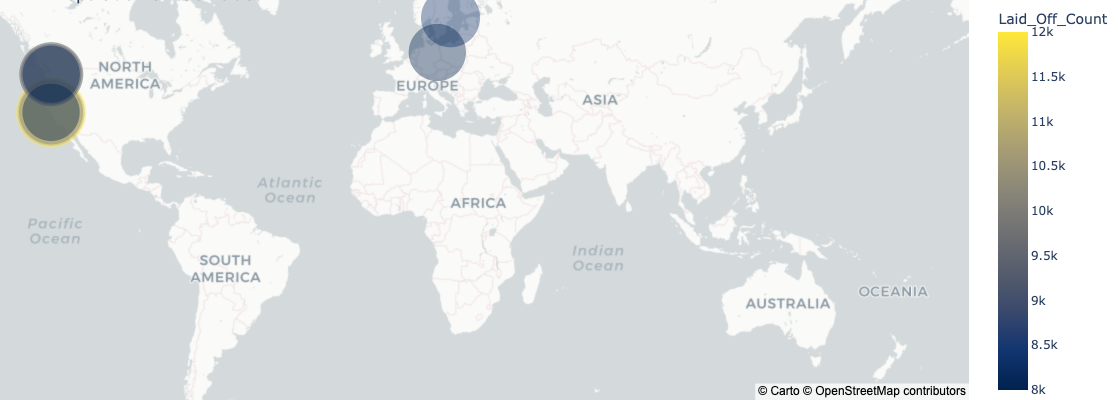

In [239]:
top10_comp_fig = px.scatter_mapbox(top10_comp,lat='latitude',lon='longitude', hover_name='Location_HQ', hover_data=['Laid_Off_Count', "Company"], 
    color='Laid_Off_Count',color_continuous_scale=px.colors.sequential.Cividis,
    size="Laid_Off_Count", size_max=50, opacity=0.4,
    center={'lat':10, 'lon':30},
    zoom=1,
    height=400,width=1400,
    mapbox_style="carto-positron")
top10_comp_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
top10_comp_fig.update_layout(title_text="Population of each cities")
top10_comp_fig.show()

/var/folders/5h/44ms15jd049cjv65pbwg11lh0000gn/T/ipykernel_92746/3072175076.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/5h/44ms15jd049cjv65pbwg11lh0000gn/T/ipykernel_92746/3072175076.py:5: UserWarning:

The palette list has more values (8) than needed (7), which may not be intended.



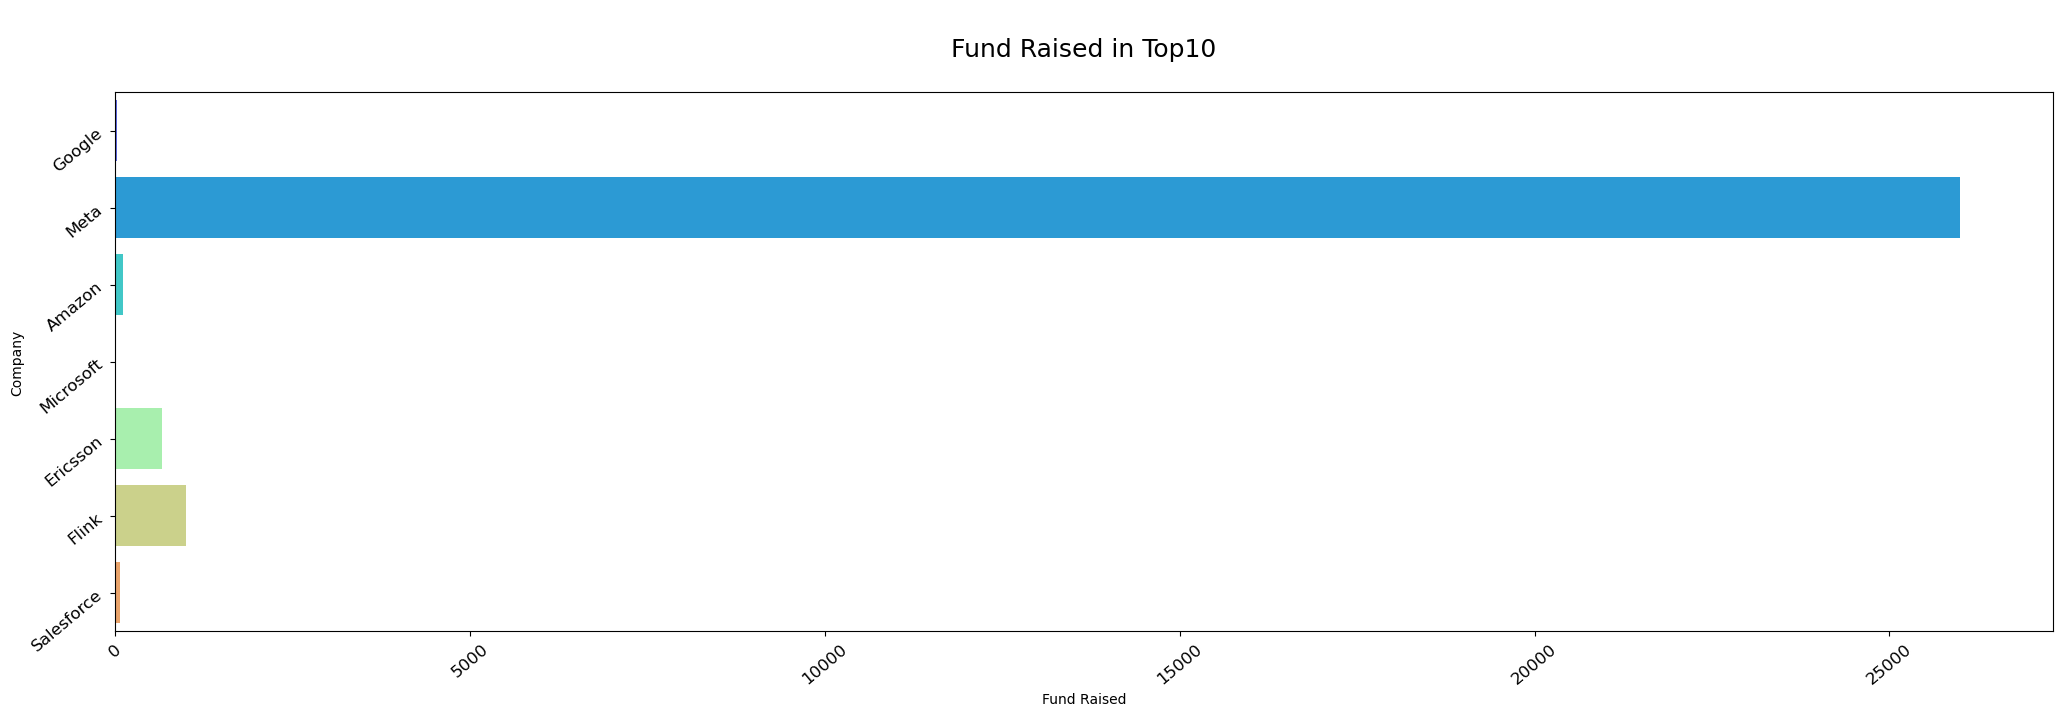

In [240]:
# Plot the resultant fund raised from the layoffs for the top 10 companies.

plt.figure(figsize=(25,7))

sns.barplot(data=top10_comp, y=top10_comp['Company'], x=top10_comp['Funds_Raised'].astype(str).astype(float), palette=palette)
plt.ylabel('Company'), plt.xlabel('Fund Raised')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nFund Raised in Top10\n", fontsize=18)

plt.show()

In [255]:
df.to_csv("data.csv", index=False)  # Save your dataframe to a CSV file